In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/spotify-2023.csv", encoding='latin')

In [9]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [20]:
# df[[   'in_spotify_charts', 'streams',  'in_apple_charts',
#        'in_deezer_charts', 'bpm',
#        'danceability_%', 'valence_%', 'energy_%',
#        'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()


for col in ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'bpm',
            'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Check its values.")


correlation_matrix = df[[   'in_spotify_charts', 'in_apple_charts',
       'in_deezer_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
print(correlation_matrix)

                    in_spotify_charts  in_apple_charts  in_deezer_charts  \
in_spotify_charts            1.000000         0.552232          0.600205   
in_apple_charts              0.552232         1.000000          0.383668   
in_deezer_charts             0.600205         0.383668          1.000000   
bpm                          0.034713         0.030962          0.028036   
danceability_%               0.030071        -0.025204          0.070913   
valence_%                    0.035531         0.047733          0.076196   
energy_%                     0.081920         0.104828          0.094627   
acousticness_%              -0.054987        -0.076793         -0.029361   
instrumentalness_%          -0.010146        -0.013145          0.005398   
liveness_%                  -0.047552        -0.018733         -0.007568   
speechiness_%               -0.081765        -0.151539         -0.080555   

                         bpm  danceability_%  valence_%  energy_%  \
in_spotify_charts 

In [21]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,in_spotify_charts,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
in_spotify_charts,1.000000,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
in_apple_charts,0.552232,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_charts,0.600205,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555
bpm,0.034713,0.030962,0.028036,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260
danceability_%,0.030071,-0.025204,0.070913,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977
valence_%,0.035531,0.047733,0.076196,0.041195,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081
energy_%,0.081920,0.104828,0.094627,0.025794,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846
acousticness_%,-0.054987,-0.076793,-0.029361,-0.017694,-0.236165,-0.081907,-0.577344,1.000000,0.042796,-0.050142,-0.022501
instrumentalness_%,-0.010146,-0.013145,0.005398,-0.001195,-0.089138,-0.132890,-0.038547,0.042796,1.000000,-0.045967,-0.083396
liveness_%,-0.047552,-0.018733,-0.007568,-0.000761,-0.077538,0.021278,0.117302,-0.050142,-0.045967,1.000000,-0.022525


Statistical tests

<Axes: >

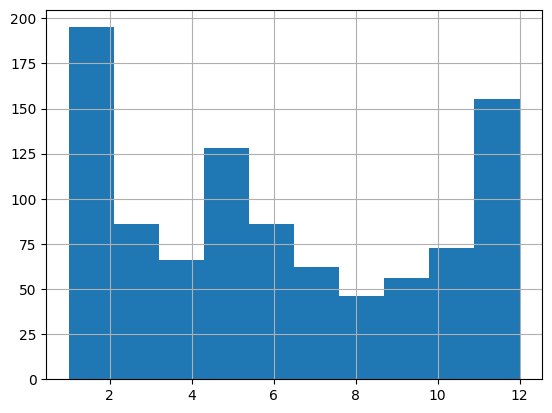

In [7]:
df.released_month.hist()

Conduct Shapiro-Wilk test to check if distirbution is normal

We should build statistical hipotesis:

* Ho(Accepted): Sample is from the normal distributions.(Po>0.05)

* Ha(Rejected): Sample is not from the normal distributions.

In [10]:
from scipy import stats

In [11]:
stats.shapiro(df.released_month)

ShapiroResult(statistic=0.9280919600439628, pvalue=5.860597783372857e-21)

Results for p-value are below 0.05 (alpha) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.

<Axes: >

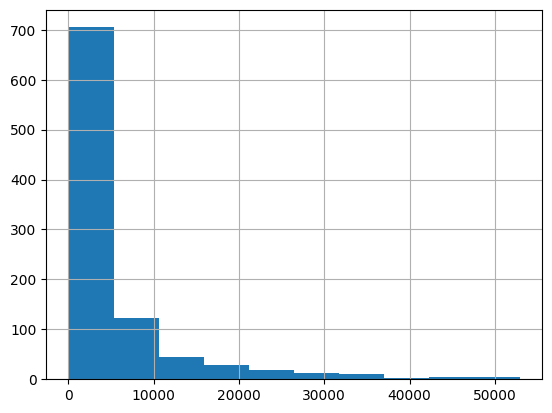

In [22]:
df.in_spotify_playlists.hist()

Tests for group comparison

In [30]:
group1 = df[df.released_month==1].in_spotify_playlists.values
group2 = df[df.released_month!=1].in_spotify_playlists.values
print(stats.mannwhitneyu(group1, group2))
print(stats.ttest_ind(group1, group2))

MannwhitneyuResult(statistic=72108.5, pvalue=5.382241495033663e-09)
TtestResult(statistic=9.032583478477948, pvalue=9.148031953449656e-19, df=951.0)


In [36]:
sorted(df[df.released_month==1]['key'].value_counts().items()), sorted(df[df.released_month!=1]['key'].value_counts().items())

([('A', 11),
  ('A#', 12),
  ('B', 5),
  ('C#', 14),
  ('D', 17),
  ('D#', 3),
  ('E', 8),
  ('F', 15),
  ('F#', 12),
  ('G', 11),
  ('G#', 13)],
 [('A', 64),
  ('A#', 45),
  ('B', 76),
  ('C#', 106),
  ('D', 64),
  ('D#', 30),
  ('E', 54),
  ('F', 74),
  ('F#', 61),
  ('G', 85),
  ('G#', 78)])

In [44]:
[tuple_items[1] for tuple_items in sorted(df[df.released_month==1]['key'].value_counts().items())]

[11, 12, 5, 14, 17, 3, 8, 15, 12, 11, 13]

In [45]:
[tuple_items[1] for tuple_items in sorted(df[df.released_month!=1]['key'].value_counts().items())]

[64, 45, 76, 106, 64, 30, 54, 74, 61, 85, 78]

https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [52]:
# Create a contingency table for 'key' and 'mode'
contingency_table = pd.crosstab(df['key'], df['mode'])

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 75.87123900339317
P-value: 3.219012684686981e-12
Degrees of freedom: 10
Expected frequencies:
[[41.52097902 33.47902098]
 [31.55594406 25.44405594]
 [44.84265734 36.15734266]
 [66.43356643 53.56643357]
 [44.84265734 36.15734266]
 [18.26923077 14.73076923]
 [34.32400932 27.67599068]
 [49.27156177 39.72843823]
 [40.41375291 32.58624709]
 [53.14685315 42.85314685]
 [50.37878788 40.62121212]]
